# Hierarchical Clustering

### Dendrogram nasıl okunur?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#çizimleri notebookta açmak için
%matplotlib inline                        
#%matplotlib notebook                     #çizimlere zoom yapmak için
plt.rcParams["figure.figsize"] = (10,6)   # çizimlerin standart boyutu
import warnings                           # uyarı mesajlarını kontrol için
warnings.filterwarnings("ignore")         # istenmeyen gereksiz mesajları göstermez
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris_1.csv")   # iris-1 data setinde species feature ı yoktur..
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


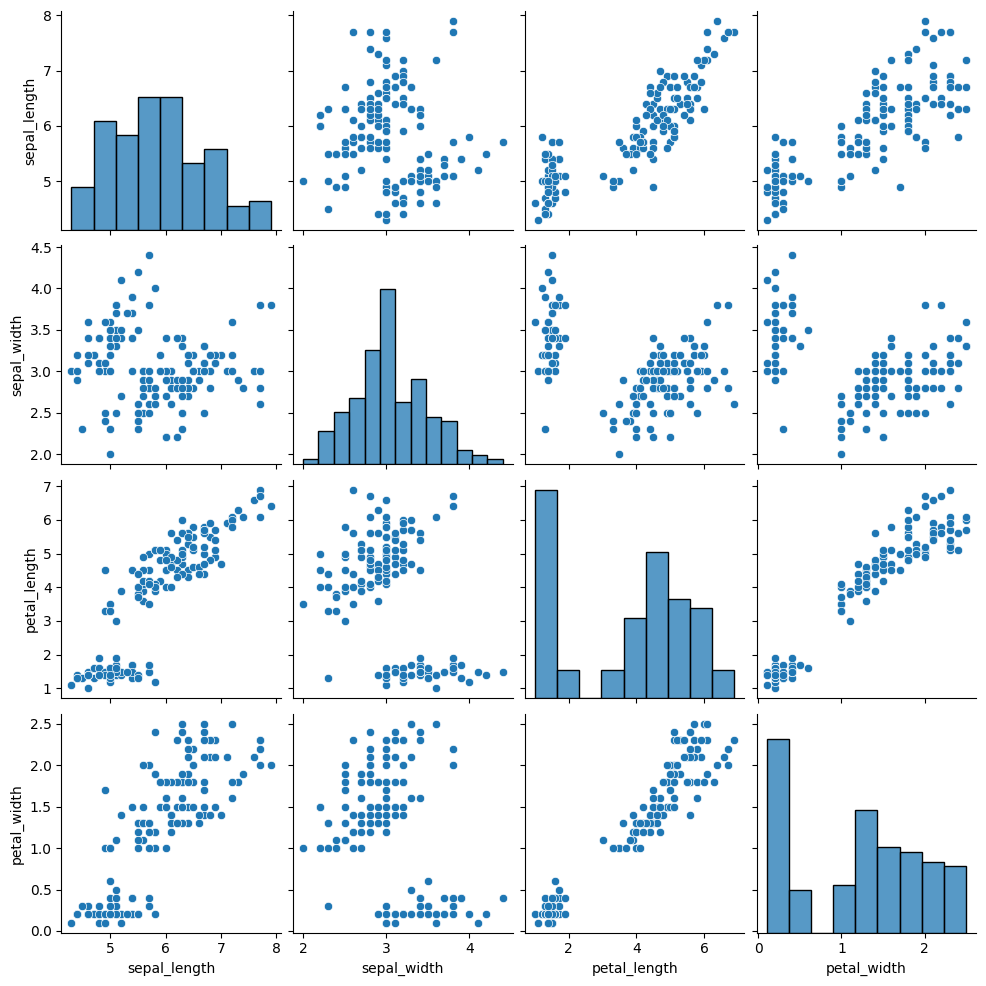

In [5]:
sns.pairplot(df);

## Scaling Data

Alt tarafta biz scale edilmemiş haliyle devam edeceğiz

## Hopkins Test

In [6]:
# pip install scikit-learn   (veya  # pip install sklearn)

In [7]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur!

In [8]:
X =df.copy()

In [9]:
hopkins(X, X.shape[0])

0.16509176761274302

## Dendrogram

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
# dendrogram()   # Dendrogram çizimini gerçekleştirmek için kullanılabilecek özellikleri verir

In [12]:
hc_ward = linkage (y= X, method ="ward") #varyansa göre - mevcut kümelenmede varyansı daha az değiştireceği yere atayacak biçimde yapar
hc_complete = linkage (X, "complete") #en uzak noktaya göre - yeni noktayı mecvut kümeler içindeki en uzak noktalara göre ölçüp daha yakın olana atama yapar
hc_average = linkage (X, "average") #ortalamaya göre - tüm kümelerin uzaklık ort. alıp yeni noktaya uzaklığı ölçer
hc_single= linkage(X ,"single") #en yakın noktaya göre-  yeni nokta, mevcut kümeler içindeki en yakın noktalara mesafe alıp daha küçük mesafe olan kümeye atar

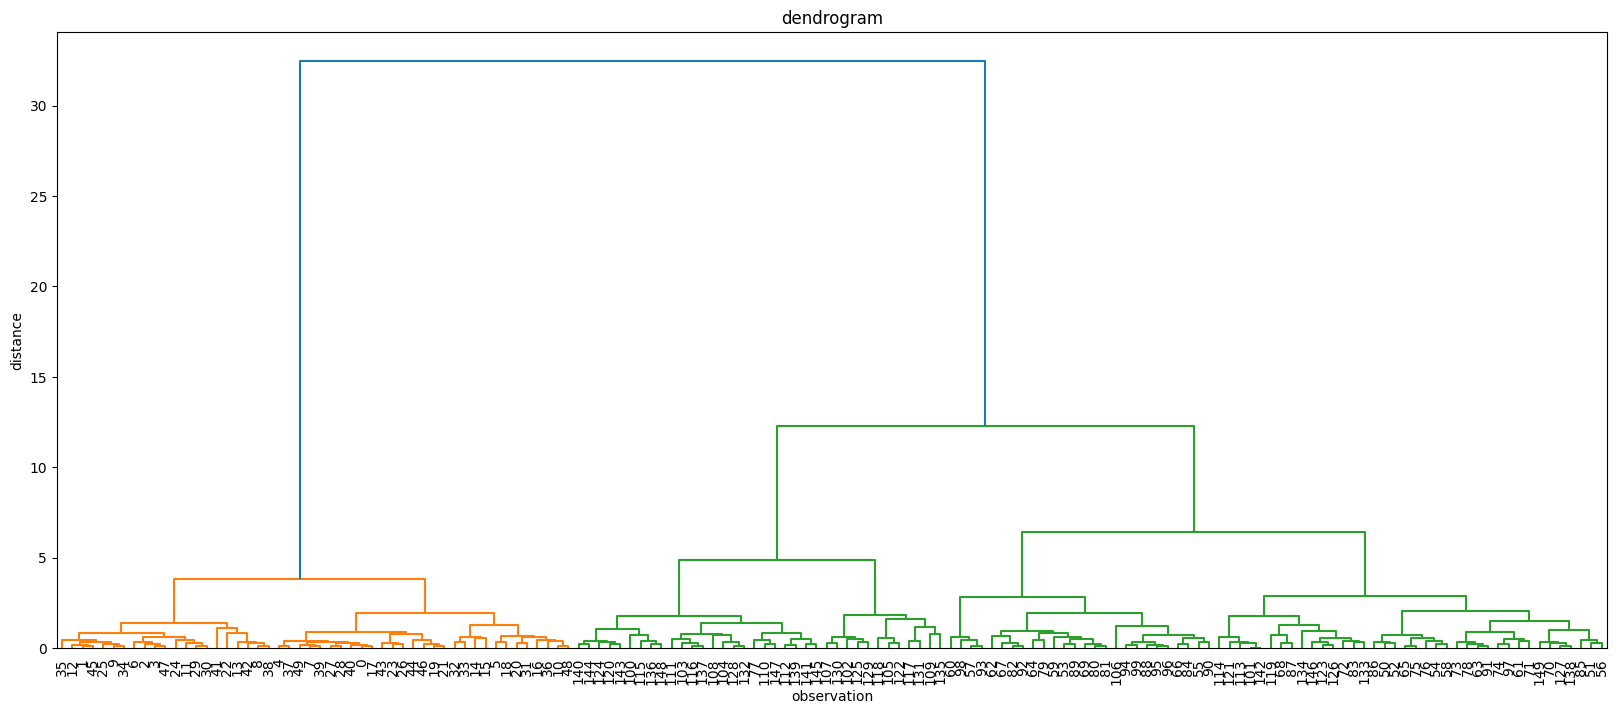

In [13]:
# dendrogram çizimini üstteki linkage hesaplamasına göre yapalım

plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);  # yukardaki seçeneklerden ward a gore dendrogram yapıyorum

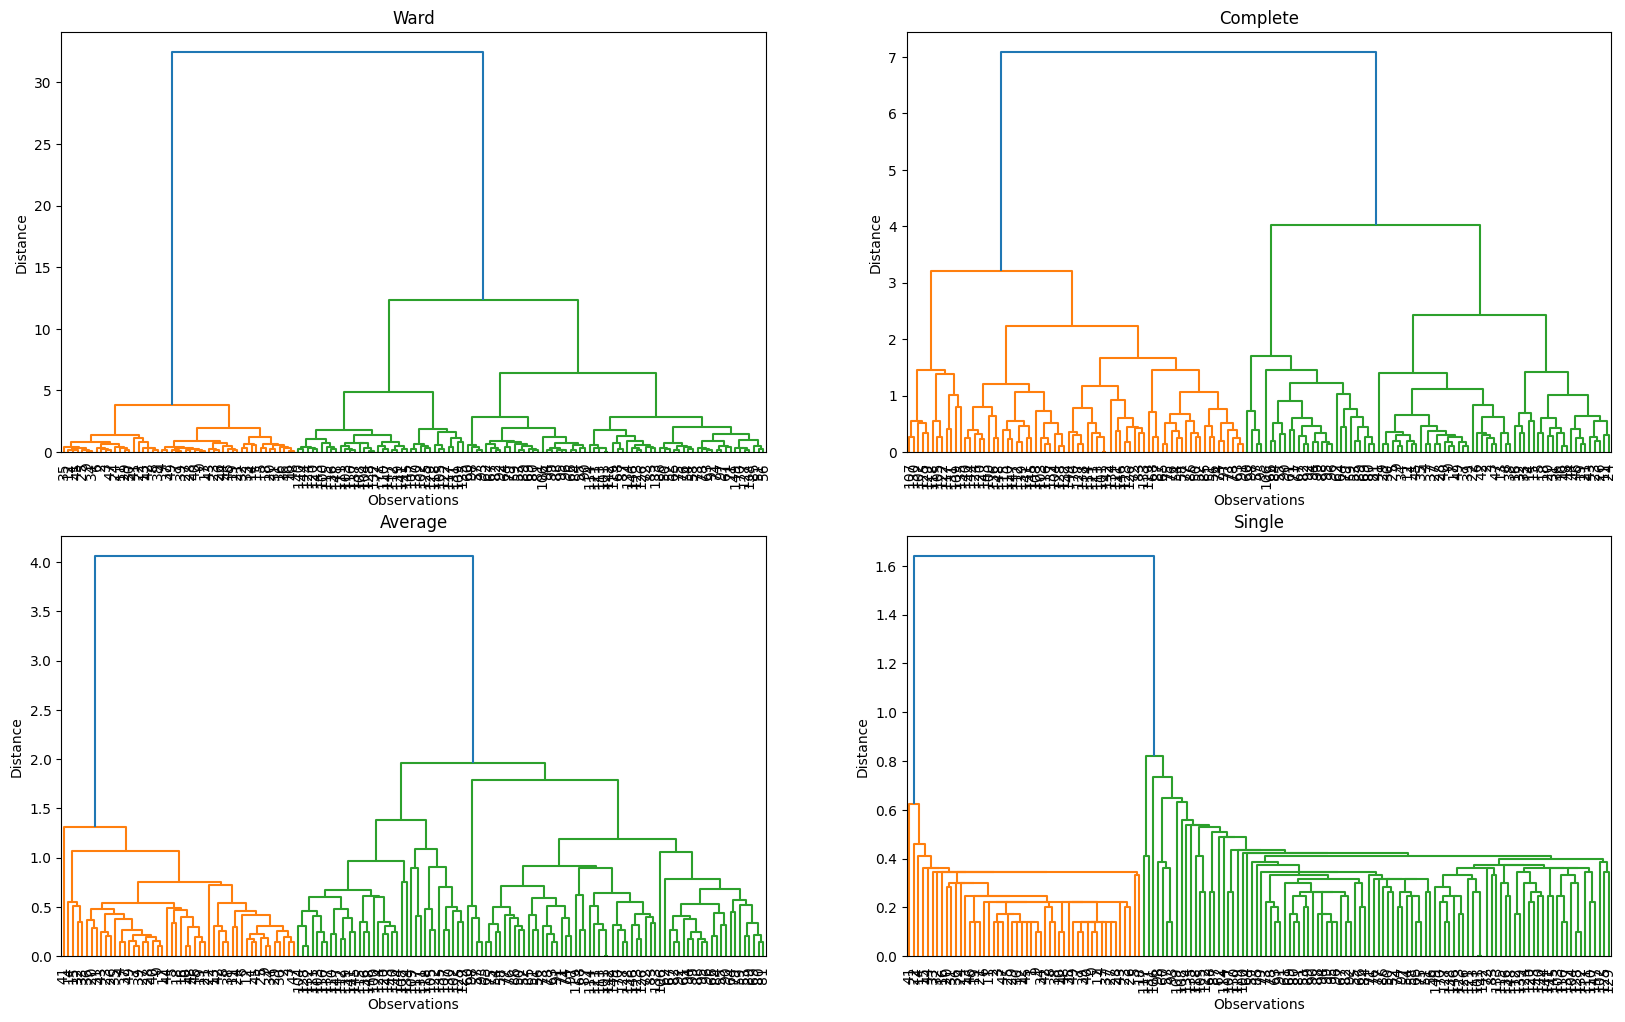

In [14]:
# butun metotlara gore dendrogram çizimi 

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

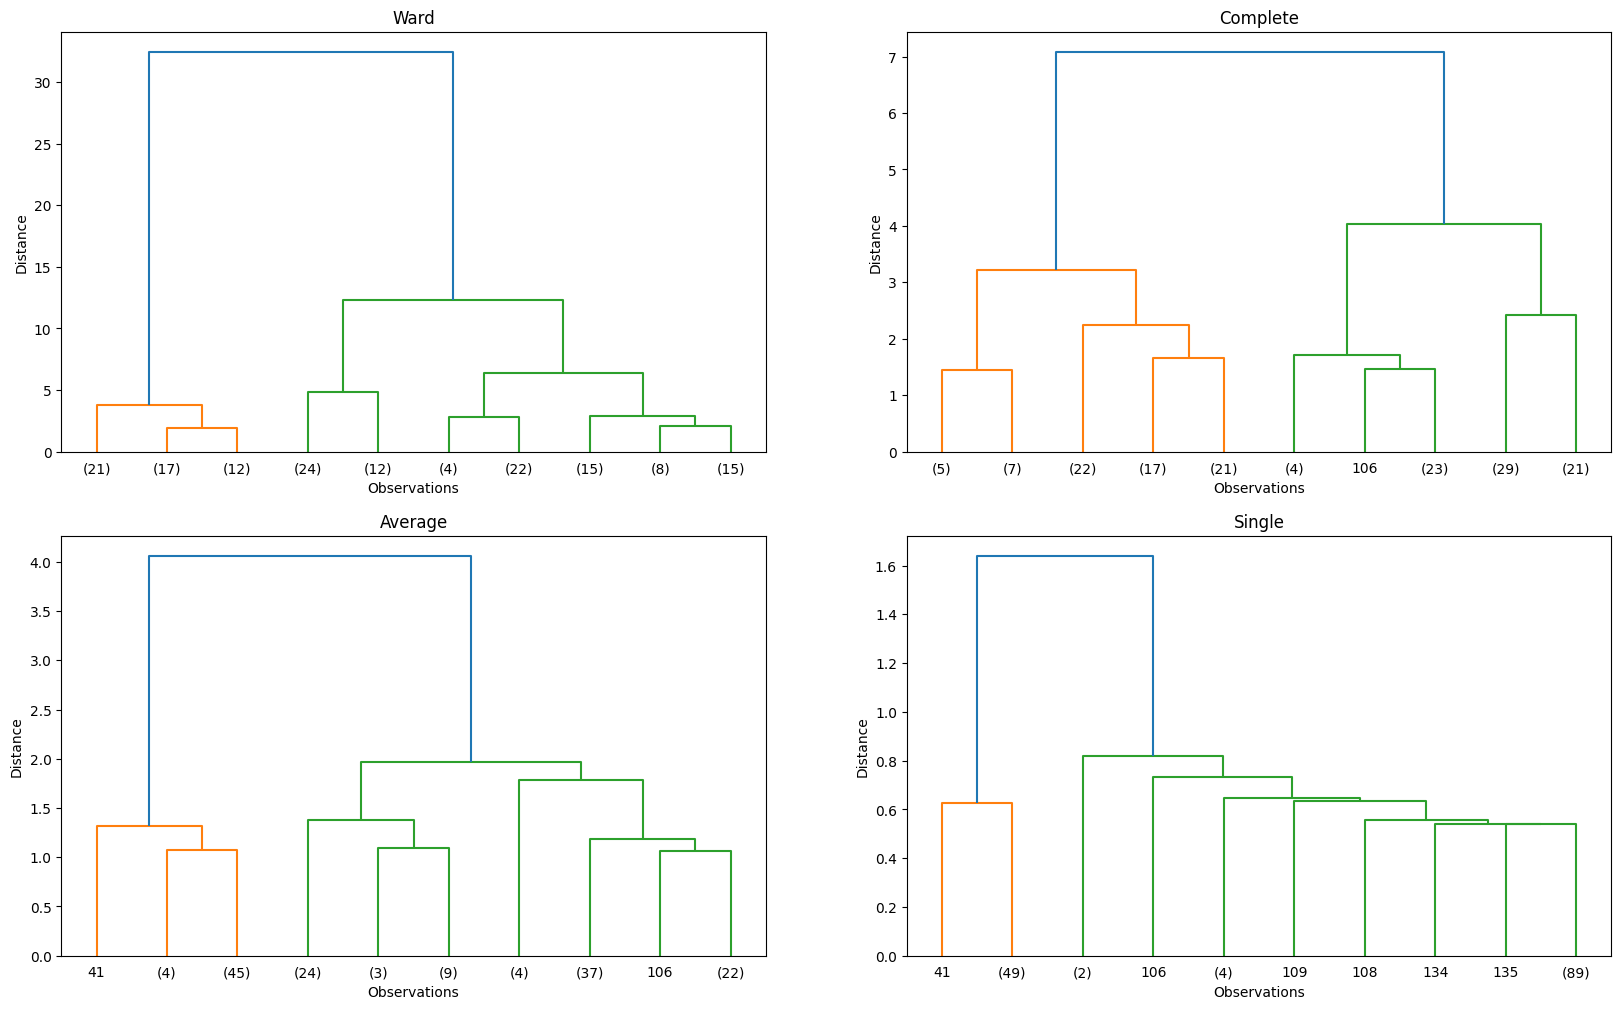

In [15]:
# grafiklerin gorunumunu sadeleştirleim

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dallarda oluşacak küme sayısı

## Hierarchical Clustering (Agglomerative)

In [16]:
from sklearn.cluster import AgglomerativeClustering

### Silhouette Score

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.6867350732769781}
f'Silhouette Score for {3} clusters {0.5543236611296426}
f'Silhouette Score for {4} clusters {0.48896708575546993}
f'Silhouette Score for {5} clusters {0.48438258927906036}
f'Silhouette Score for {6} clusters {0.359237619260309}
f'Silhouette Score for {7} clusters {0.34220719366205077}
f'Silhouette Score for {8} clusters {0.3435906599119544}
f'Silhouette Score for {9} clusters {0.3304886352874667}


In [19]:
model1 =  AgglomerativeClustering(n_clusters=3,linkage = "ward") 
model1.fit_predict(X)

# Kmeans den farklı olarak buradda sadece "fit_predict" yapılır

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [20]:
model1.labels_

#Alttaki değerler Agglomerative Clustering tekniğiyle elde ettiğimiz (prediction) küme atamalarını gösterir

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

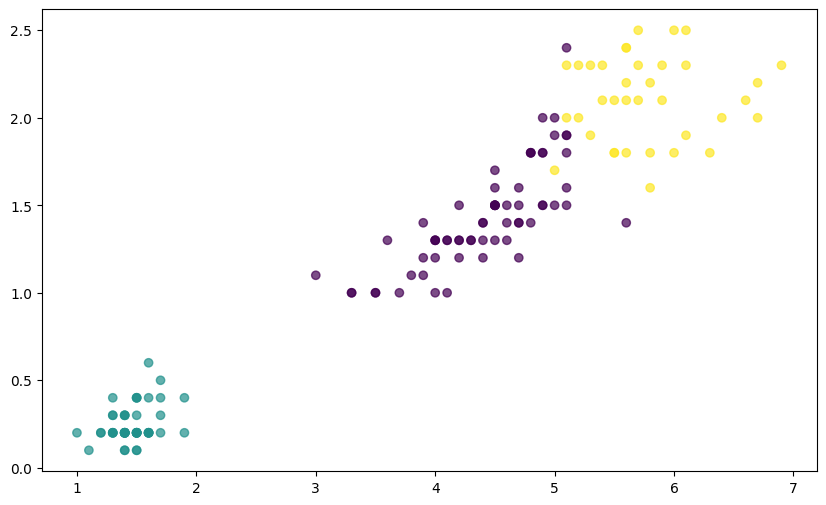

In [21]:
# kumelere yeni atanan gozlemlerin çizimini gorelim (gerçek degerlere gore çizilmedi !!)

plt.scatter(X["petal_length"], X["petal_width"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

In [22]:
clusters = model1.labels_      # model tahminlerimi clusters variable' a atadım

In [23]:
df["predicted_clusters"] = clusters    # orjinal data setine "predicted_clusters" feature 'ı ekledik'
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [24]:
odf = pd.read_csv("iris.csv")
labels = pd.DataFrame(odf["species"])   # uzmandan gelen label (orjinal data setinden çekiyoruz)
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [25]:
X["predicted_clusters"] = clusters
X["labels"] = labels
X 

# altta görülen tabloda hem uzmandan gelen değerler hem de bizim predicted değerlerimiz aynı data frame de

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Cross table Calculation

In [27]:
# cross table (crosstab) ile karşılaştırma yapalım

ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [ ]:
# 0. labels 49 doğru tahmin ama 15 fazladan tahmin etmiş, onları yanlış kategorisine alıyoruz 
# 1.    ''   50  ''     ''
#2.      ''  35  ''     ''   1 yanlış tahmin 14 ünü bilememiş 

#  Toplam 15+1 = 16 hatalı sonuç var

## ARI Score

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score

In [29]:
adjusted_rand_score(X.labels, X.predicted_clusters)  # gerçek ve predicted degerleri yazıyoruz

# Rand index skoru hesaplanırken string ve int degerleri birbiriyle karşılaştırabilir

0.7311985567707746

## Visualization Clusters

gerçek ve predict değerleri görselleştirerek karşılaştıralım

In [30]:
# kategorik verileri, analiz için uygun olan sayısal verilere çevirmek amacıyla kullanılır

X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

alttaki 2 grafikte uzman görüşü (actual) ve predicted olan bizim küme tahminlerini karşılaştırma yapacağız

ilk grfaik sepal length ve sepal width e göre çizildi

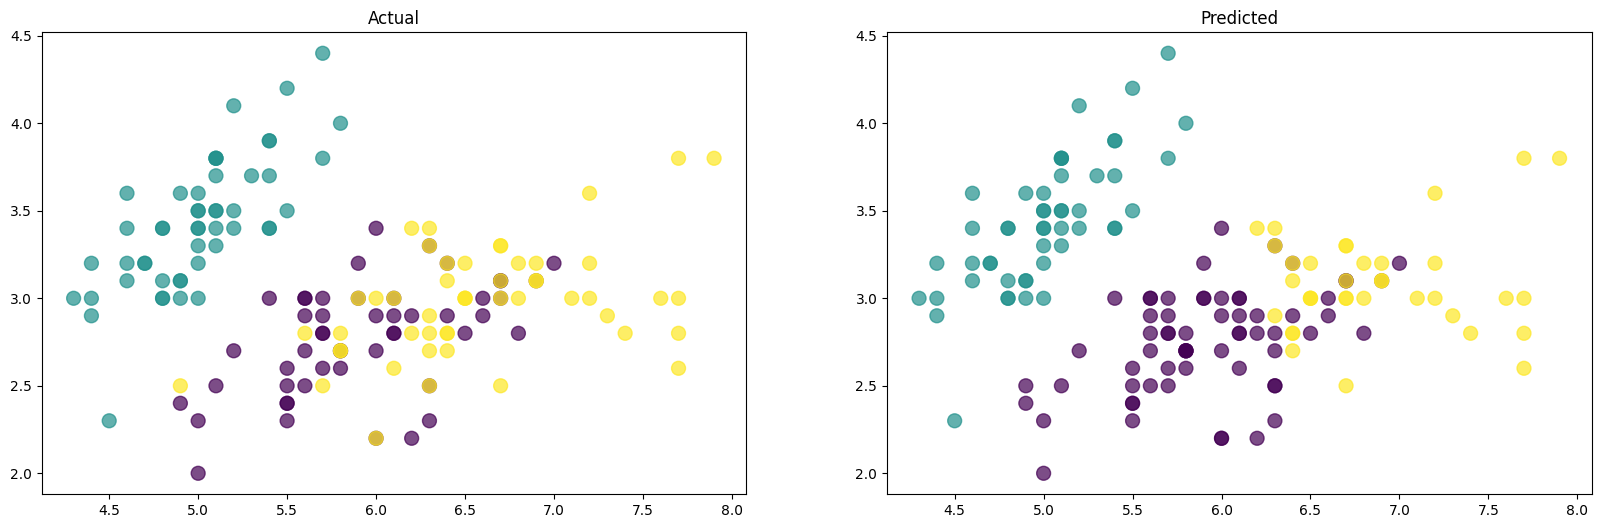

In [32]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

In [ ]:
bir de petal length-petal width e göre çizelim. üsttekine benzer şekilde geçişler var

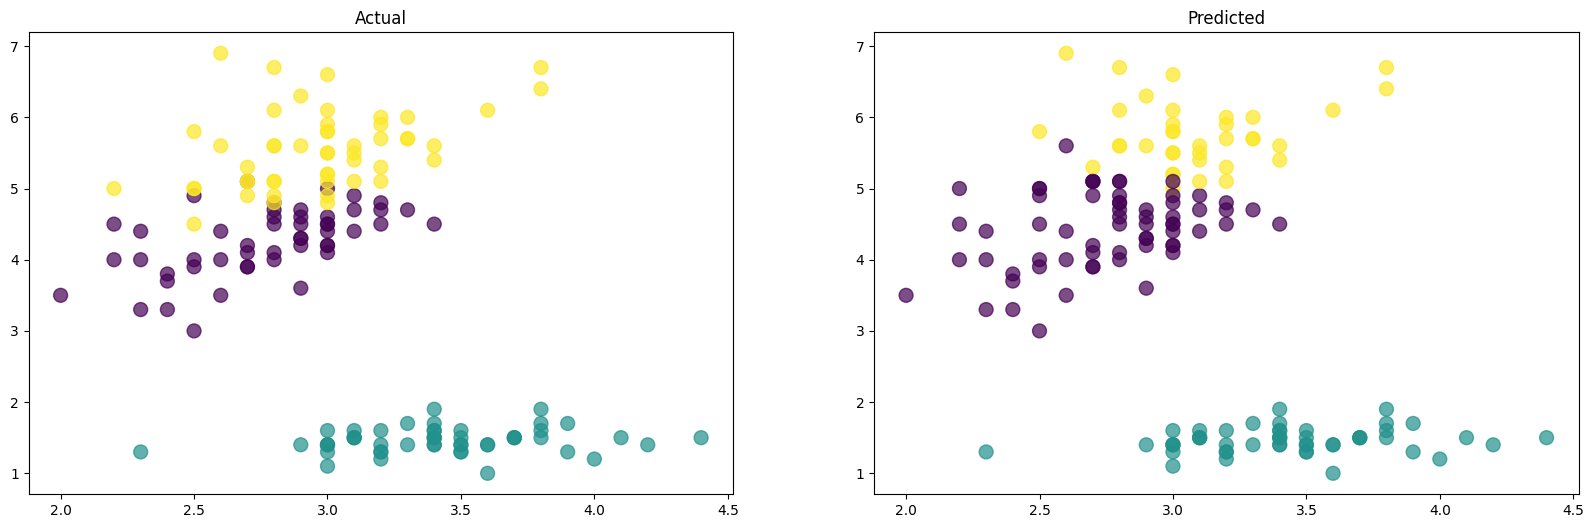

In [34]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

In [35]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [36]:
# groupby ile feature' ların ortalama değerlerini üretelim

clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


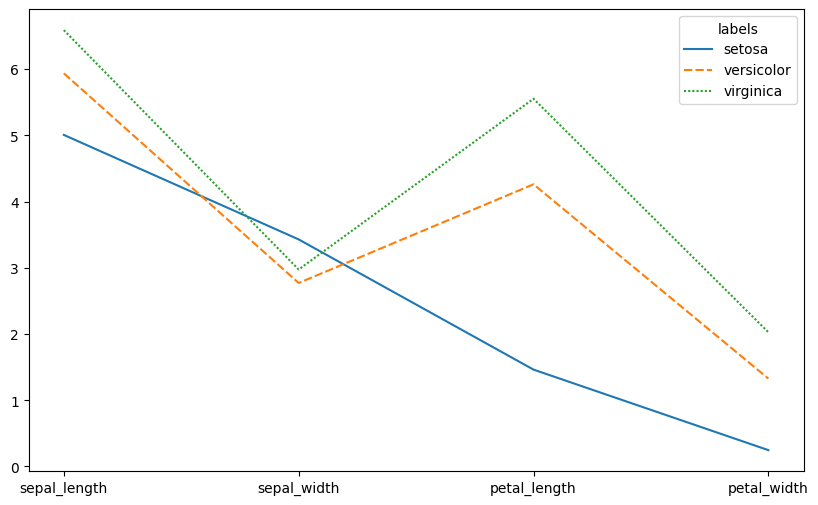

In [37]:
sns.lineplot(data = clus_pred);

<Axes: xlabel='labels', ylabel='petal_width'>

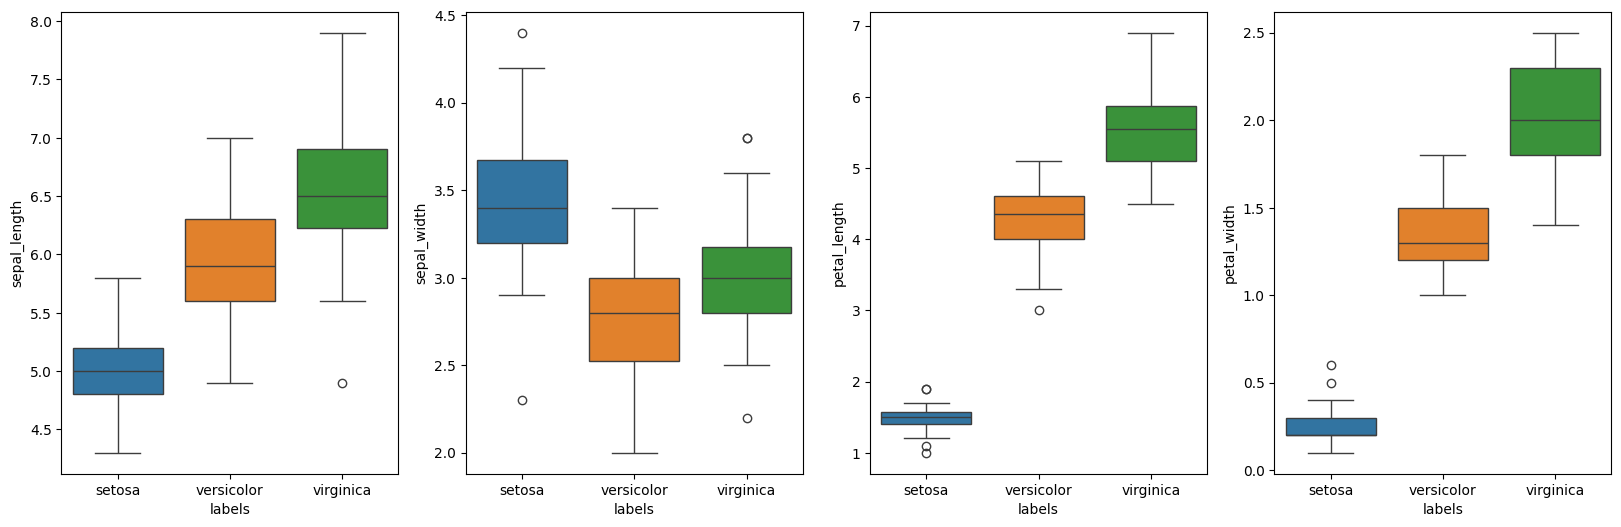

In [38]:
# BOX Plot çizimi

plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X, palette="tab10")
plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X, palette="tab10")
plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X, palette="tab10")
plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X, palette="tab10")

### Dendrogram

In [39]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


**NOT**:burada ilave olarak Hopkins e de bakaiblirdik. onun da düşmüş olacağını yine görecektik, tekrar buraya almadım.

In [40]:
hc_ward = linkage(y = X2, method = "ward") # X2  seti için 'ward' yöntemiyle birleştirici hiyerarşik kümeleme gerçekleştirir.
hc_complete = linkage(X2, "complete")  # complete' veya 'maksimum' yöntemini kullanır
hc_average = linkage(X2, "average")  # tüm çiftler arasındaki ortalama uzaklığı kullanarak kümeleri birleştirir
hc_single = linkage(X2, "single")  # Single' veya 'minimum' yöntemi, kümeler arasındaki en yakın noktaları dikkate alı

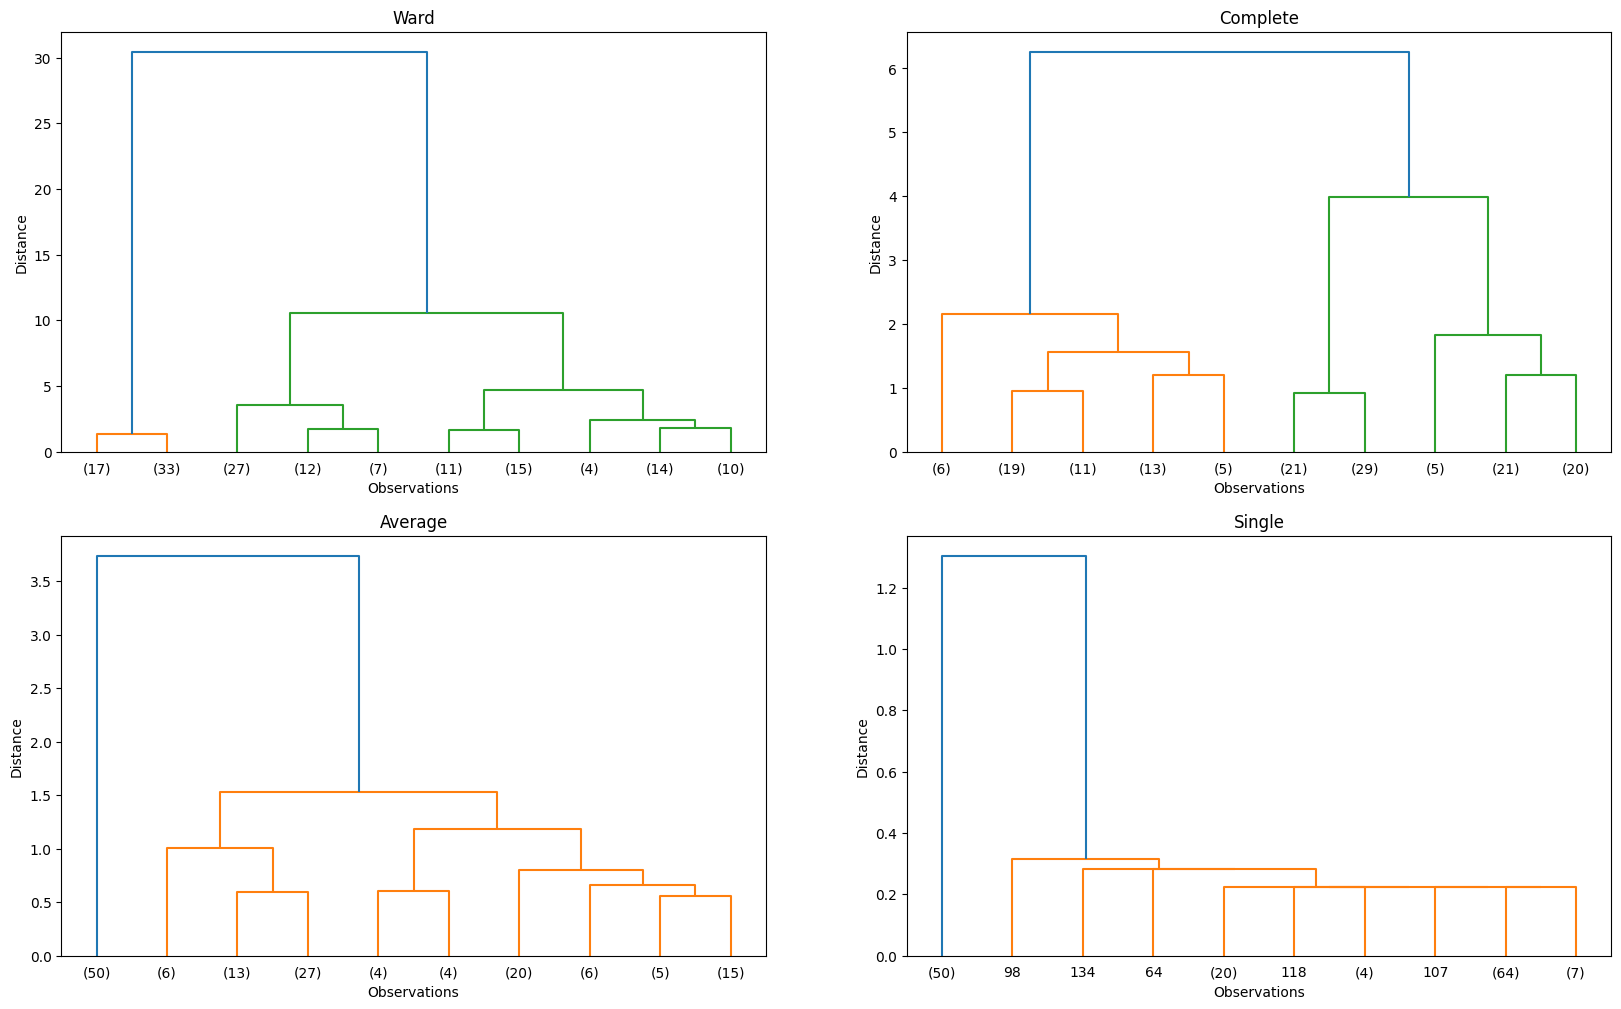

In [41]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

In [42]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622770762
Silhouette Score for 3 clusters: 0.6573949269287823
Silhouette Score for 4 clusters: 0.5895284480910935
Silhouette Score for 5 clusters: 0.5781917218437669
Silhouette Score for 6 clusters: 0.5747380906148477
Silhouette Score for 7 clusters: 0.5830818097709548
Silhouette Score for 8 clusters: 0.5678904784921739
Silhouette Score for 9 clusters: 0.5469910001848306


In [ ]:
silhouette_score için öncekine göre iyileşme var

## Final model

In [43]:
final_model = AgglomerativeClustering(n_clusters=3, linkage = "complete")
clusters = final_model.fit_predict(X2)

In [44]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,2,setosa
1,1.4,0.2,2,setosa
2,1.3,0.2,2,setosa
3,1.5,0.2,2,setosa
4,1.4,0.2,2,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


### Cross Table for Final model

In [45]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

# yeni durumu gosteriyor..  6 tane hata var

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,0,45,1
2,50,0,0


In [46]:
ct    # alttaki tablo  daha önceki degerleri gösteriyor.. 16 hatalı kumeleme

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


Altta orjinal ve yeni clusterlama karşılaştırmasını gorsel olarak aşağıda yeniden yapalım

In [47]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

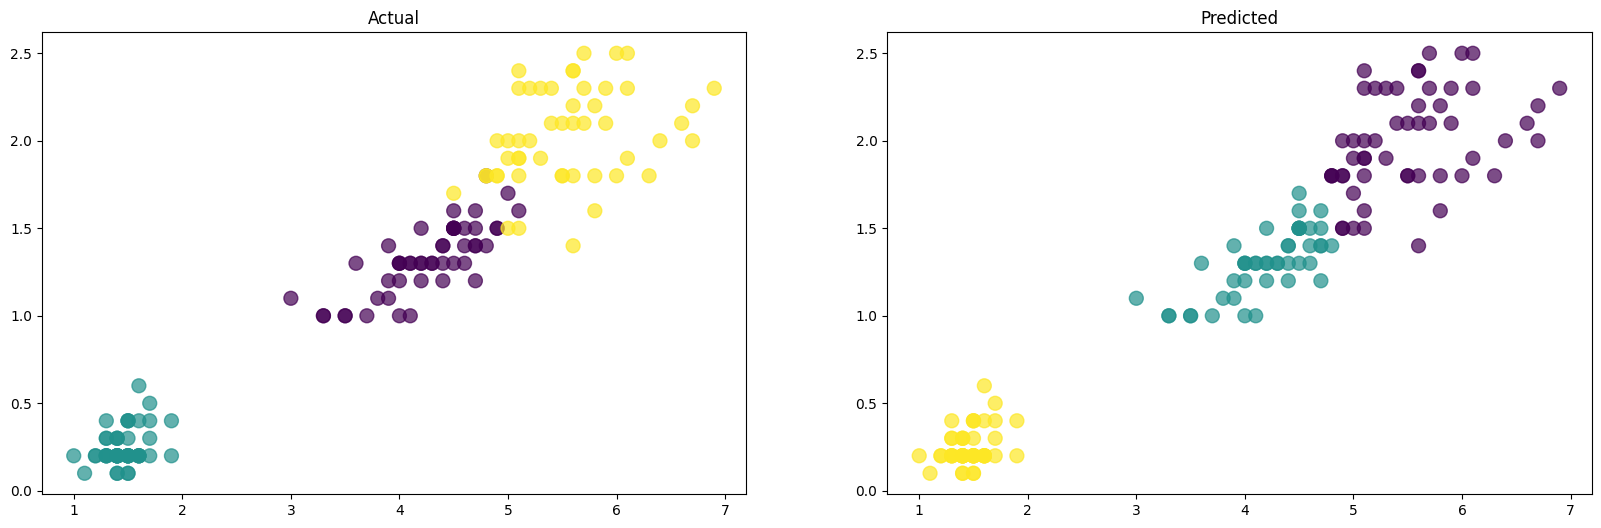

In [48]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

**NOT**: önceki grafiğe göre sağ taraftaki predicted grafiğinde daha iyi ayrışma olduğu görülüyor

### ARI Score

In [49]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8857921001989628

Daha önceki Rand skorununu  geliştiğini ve 1 ' e daha da yaklaştığını görmüş olduk

## Prediction cluster of new data

In [50]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [51]:
final_model.predict(new_data)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

Agglomerative de predict fonksiyonu yok

tahmin yapmak için df in altına bu iki yeni satırı ekleyip komple yeni df i tekrar modele sokmak gerekiyor YENİ DATA GELİNCE DATAYA YENİ SATIR OLARAK EKLEYİP YENİDEN MODEL KURACAĞIZ

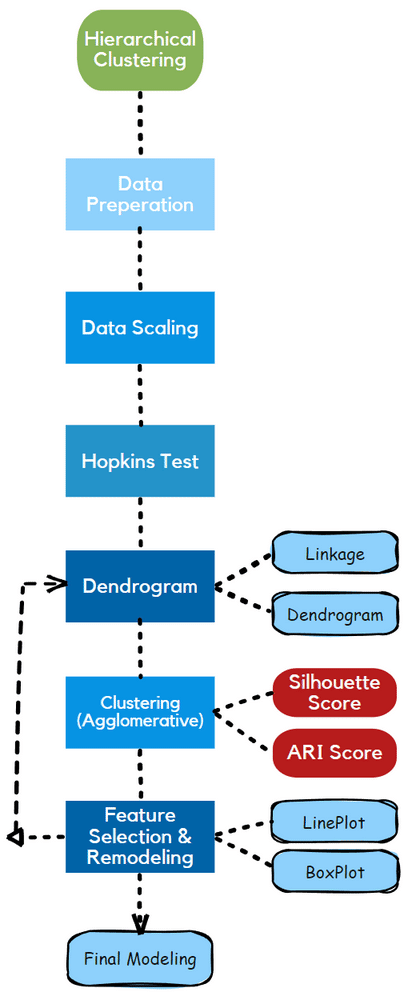